In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv("blb_gaussian_var.csv")

In [2]:
list_of_n = df.n.unique()
print(list_of_n)
estimates_std = []
standard_error = []

for n_val in list_of_n:
    estimates_std.append(np.std(df.loc[df.n==n_val, :]['estimator_mean']))
    standard_error.append(np.mean(df.loc[df.n==n_val, :]['estimator_variance']))

[ 1000  2500  5000 10000 15000 20000]


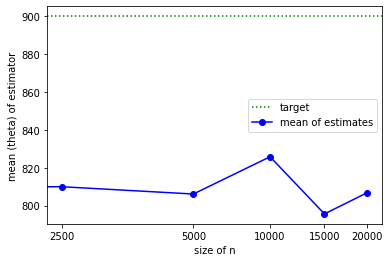

In [4]:
true_mean = 190
true_sd = 30
true_var = true_sd**2

point_estimates = []
for n_val in list_of_n:
    point_estimates.append(np.mean(df.loc[df.n==n_val, :]['estimator_mean']))

plt.xscale('log')
plt.axhline(y=true_var, color='green', linestyle=':', label = 'target')
plt.plot([str(e) for e in list_of_n], point_estimates, 
     marker='o', color='blue', label='mean of estimates')
plt.xlabel("size of n")
plt.ylabel("mean (theta) of estimator")
plt.legend()
plt.show()

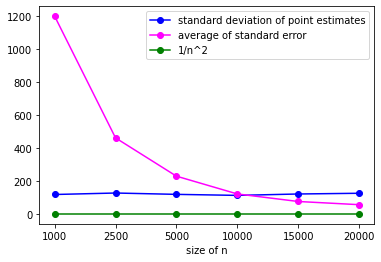

In [5]:
plt.plot([str(e) for e in list_of_n], estimates_std, 
         marker='o', color='blue', label='standard deviation of point estimates')
plt.plot([str(e) for e in list_of_n], standard_error, 
         marker='o', color='magenta', label='average of standard error')
plt.plot([str(e) for e in list_of_n], [(1/(e^2)) for e in list_of_n], 
         marker='o', color='green', label='1/n^2')
plt.xlabel("size of n")
plt.legend()
plt.show()

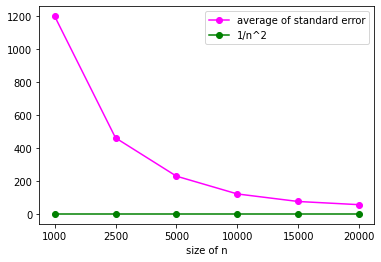

In [6]:
plt.plot([str(e) for e in list_of_n], standard_error, 
         marker='o', color='magenta', label='average of standard error')
plt.plot([str(e) for e in list_of_n], [(1/(e^2)) for e in list_of_n], 
         marker='o', color='green', label='1/n^2')
plt.xlabel("size of n")
plt.legend()
plt.show()

In [7]:
ci_success_trials = np.zeros(100) #T
ci_success_over_n = []

true_theta = 190


index = 0
for n_val in list_of_n:
    for i in range(100):
        theta = (df.loc[df.n==n_val, :]['estimator_mean'])[index]
        sigma_sq = (df.loc[df.n==n_val, :]['estimator_variance'])[index]
        index += 1        
         
        ci = st.norm.interval(alpha=0.95, loc=theta, scale=np.sqrt(sigma_sq))
        if ci[0] <= true_theta <= ci[1]:
            ci_success_trials[i] = 1
    ci_success_over_n.append(np.mean(ci_success_trials))
    
print(ci_success_over_n)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
